In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import os

In [3]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
defaults.device = torch.device('cpu')
defaults.device

device(type='cpu')

In [4]:
bs=64

In [5]:
base_path = './captchas/test/'
fnames = get_image_files(base_path)
fnames[:5]

[PosixPath('captchas/test/1111.jpg'),
 PosixPath('captchas/test/1112.jpg'),
 PosixPath('captchas/test/1116.jpg'),
 PosixPath('captchas/test/1117.jpg'),
 PosixPath('captchas/test/1119.jpg')]

In [6]:
len(fnames)

3721

In [7]:
alist = os.listdir(base_path)

for i in range(len(alist)):
    alist[i] = [alist[i]]
    
    for j in range(4):
        alist[i].append(alist[i][0][j])

df = pd.DataFrame(alist)

In [8]:
alist[:5]

[['1111.jpg', '1', '1', '1', '1'],
 ['1112.jpg', '1', '1', '1', '2'],
 ['1116.jpg', '1', '1', '1', '6'],
 ['1117.jpg', '1', '1', '1', '7'],
 ['1119.jpg', '1', '1', '1', '9']]

In [9]:
df.head()

,0,1,2,3,4
0,1111.jpg,1,1,1,1
1,1112.jpg,1,1,1,2
2,1116.jpg,1,1,1,6
3,1117.jpg,1,1,1,7
4,1119.jpg,1,1,1,9


In [10]:
data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=1)
# data = ImageDataLoaders.from_df(df, folder=base_path, size=(77, 247), bs=bs, seed=43, label_col=1)

/home/stephnoutsa/anaconda3/envs/py3_env/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
m
  if getattr(ds, 'warn', False): warn(ds.warn)


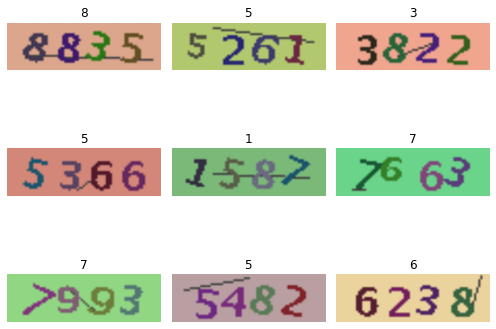

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)

In [13]:
learn.path

Path('.')

AttributeError: 'Sequential' object has no attribute 'plot'

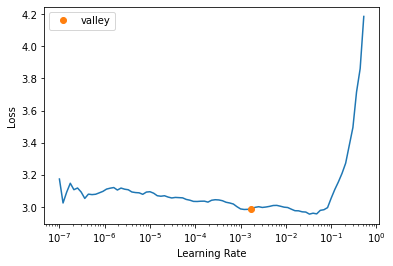

In [14]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-2
learn.fit_one_cycle(20, max_lr=lr, wd=0.01)

In [ ]:
learn.save('stage-indi-1')

In [ ]:
learn.load('stage-indi-1');

In [ ]:
learn.path

In [ ]:
img = open_image('test.jpg');
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)

In [ ]:
str(pred_class)

In [ ]:
pred_idx

In [ ]:
outputs

In [ ]:
for i in range(4):
  print('Number ' + str(i))

  data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=i+1)
  learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)
  lr = 1e-2
  learn.fit_one_cycle(30, max_lr=lr, wd=0.01)

  learn.save('stage-indi-pos-' + str(i+1))

In [12]:
learn_list = []

data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=1)
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)
learn.load('stage-indi-pos-1')
learn_list.append(learn)

data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=2)
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)
learn.load('stage-indi-pos-2')
learn_list.append(learn)

data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=3)
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)
learn.load('stage-indi-pos-3')
learn_list.append(learn)

data = ImageDataBunch.from_df(base_path, df, folder='', size=(77, 247), bs=bs, seed=43, label_col=4)
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1, pretrained=False)
learn.load('stage-indi-pos-4')
learn_list.append(learn)

/home/stephnoutsa/anaconda3/envs/py3_env/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
m
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/stephnoutsa/anaconda3/envs/py3_env/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
o
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/stephnoutsa/anaconda3/envs/py3_env/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
d
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/stephnoutsa/anaconda3/envs/py3_env/lib/python3.6/site-packages/fastai/data_bloc

In [ ]:
figures = []

for learner in learn_list:
    figures.append(learner.interpret().plot_top_losses(
        2, heatmap=True,heatmap_thresh=14,figsize=(7,2), largest=False, return_fig=True
    ))

In [13]:
img = open_image('test.jpg')
img

In [14]:
for i in learn_list:
    pred_class, pred_idx, outputs = i.predict(img)
    print(str(pred_class))

1
2
3
7
